In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input


import os

from scipy.stats import zscore

In [2]:
#Functions
def calc_loss(data, reconstructed_data):
    return np.mean(np.square(data - reconstructed_data), axis=1)

Load and prepare data

In [8]:
data_df=pd.read_csv('../data/fraud.csv')
data_df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
5,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,0.501038,...,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0
6,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,...,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0
7,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,0.534571,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0
8,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.267610,0.794515,0.449275,0.500230,...,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0
9,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,0.269325,0.786131,0.437401,0.501132,...,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0


In [9]:
print(data_df['class'].unique())
print(data_df['class'].value_counts())

[0 1]
class
0    284315
1       492
Name: count, dtype: int64


In [10]:
data_df[data_df['class']==0].head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
5,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,0.501038,...,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0
6,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,...,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0
7,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,0.534571,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0
8,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.267610,0.794515,0.449275,0.500230,...,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0
9,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,0.269325,0.786131,0.437401,0.501132,...,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0


In [11]:
data_df[data_df['class']==1].head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
541,0.919012,0.787855,0.809517,0.429154,0.762201,0.248677,0.249897,0.800314,0.367355,0.451365,...,0.569817,0.508396,0.658525,0.425381,0.580406,0.454498,0.421331,0.310216,0.000000,1
623,0.906588,0.733944,0.856275,0.353384,0.774870,0.252314,0.267339,0.784658,0.453446,0.491372,...,0.572146,0.530346,0.685868,0.342644,0.593612,0.401704,0.411845,0.313850,0.020591,1
4920,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,0.477162,...,0.556737,0.466535,0.667999,0.370466,0.569143,0.336811,0.417241,0.310018,0.009339,1
6108,0.883578,0.781591,0.792483,0.370723,0.758122,0.245862,0.244056,0.782717,0.454245,0.409378,...,0.570726,0.518287,0.658956,0.375025,0.592075,0.318049,0.401244,0.330364,0.002297,1
6329,0.979262,0.799121,0.762821,0.461731,0.790114,0.249369,0.275794,0.780061,0.418588,0.458085,...,0.555369,0.477181,0.655679,0.162235,0.661482,0.518034,0.416326,0.316103,0.000039,1
6331,0.958437,0.810919,0.729271,0.547860,0.770889,0.229308,0.255415,0.787044,0.366466,0.380697,...,0.567356,0.481665,0.657421,0.399609,0.661459,0.508423,0.430093,0.323546,0.000039,1
6334,0.958749,0.810862,0.723728,0.533356,0.774668,0.237749,0.255065,0.788638,0.354633,0.383644,...,0.567452,0.483126,0.655489,0.279837,0.668002,0.513767,0.430115,0.323203,0.000039,1
6336,0.963893,0.806435,0.737325,0.521375,0.776941,0.238687,0.260403,0.786813,0.386501,0.402492,...,0.564004,0.479594,0.657242,0.285683,0.657374,0.516150,0.426303,0.321332,0.000039,1
6338,0.963670,0.807450,0.740111,0.520008,0.776178,0.236363,0.260807,0.785982,0.370504,0.406112,...,0.564846,0.486158,0.656763,0.352610,0.660688,0.505684,0.426088,0.321292,0.000039,1
6427,0.970622,0.791536,0.745053,0.429587,0.754067,0.245604,0.241178,0.796796,0.446035,0.413033,...,0.570985,0.515141,0.674360,0.333091,0.474450,0.482932,0.427485,0.315140,0.000039,1


### Separate train/test

In [12]:
##all anomaly for test
data_anomaly_test=data_df[data_df['class']==1].copy(deep=True)
data_anomaly_test.index=range(len(data_anomaly_test))
#delete class column
data_anomaly_test=data_anomaly_test[[x for x in list(data_anomaly_test.columns) if x!='class']]

In [13]:
##separate normal to train/test
data_norm=data_df[data_df['class']==0].copy(deep=True)

data_norm_train=data_norm[:len(data_norm)-492]
data_norm_test=data_norm[len(data_norm)-492:]

data_norm_train.index=range(len(data_norm_train))
data_norm_test.index=range(len(data_norm_test))
#delete class column
data_norm_train=data_norm_train[[x for x in list(data_norm_train.columns) if x!='class']]
data_norm_test=data_norm_test[[x for x in list(data_norm_test.columns) if x!='class']]

In [14]:
##Prepare for modeling
X=np.asarray(data_norm_train)
X.shape

(283823, 29)

In [21]:
#Create autoenccoder
input_dim=29

model_autoenc=Sequential()
model_autoenc.add(Input(shape=(input_dim,)))
model_autoenc.add(Dense(64, activation='relu'))
model_autoenc.add(Dense(32, activation='relu'))
model_autoenc.add(Dense(16, activation='relu'))
model_autoenc.add(Dense(8, activation='relu'))
model_autoenc.add(Dense(16, activation='relu'))
model_autoenc.add(Dense(32, activation='relu'))
model_autoenc.add(Dense(64, activation='relu'))
model_autoenc.add(Dense(input_dim))

In [22]:
model_autoenc.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 29)                  │           1,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,349 (36.52 KB)

 Trainable params: 9,349 (36.52 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_autoenc.compile(optimizer='adam', loss='mse')

In [24]:
history=model_autoenc.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=1)

Epoch 1/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0065
Epoch 2/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 7.5487e-04
Epoch 3/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 6.7443e-04
Epoch 4/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 6.4010e-04
Epoch 5/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 6.0730e-04
Epoch 6/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 5.7950e-04
Epoch 7/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 5.3086e-04
Epoch 8/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 5.1153e-04   
Epoch 9/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 5.1952e-04
Epoch 10/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 5.8006e-04
Epoch 11/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 5.6583e-04
Epoch 12/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 4.4432e-04
Epoch 13/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 4.3013e-04
Epoch 14/50
8870/8870 ━━━━━━━━━━━━━━━━━━━━ 9

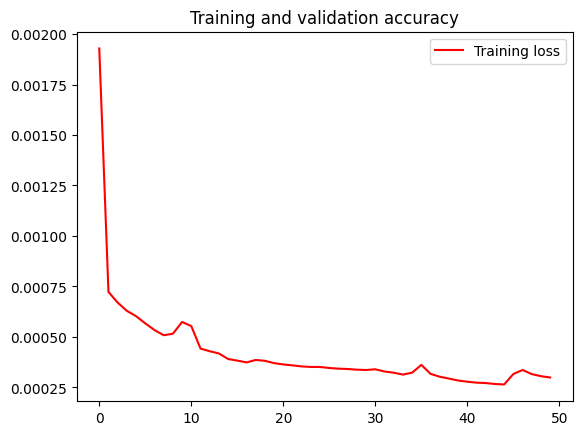

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [51]:
#acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(loss))

#plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('../outputs/figures/training_loss.png')
plt.show()
plt.figure()

In [40]:
reconstructed_norm = model_autoenc.predict(data_norm_test)
reconstructed_anomaly = model_autoenc.predict(data_anomaly_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [41]:
loss_norm=calc_loss(
    data_norm_test, reconstructed_norm)
loss_anomaly=calc_loss(data_anomaly_test, reconstructed_anomaly)

In [42]:
loss_norm

0      0.000160
1      0.000216
2      0.000046
3      0.000183
4      0.000273
         ...   
487    0.005301
488    0.000226
489    0.000087
490    0.000205
491    0.000288
Length: 492, dtype: float64

In [43]:
loss_anomaly

0      0.003895
1      0.000351
2      0.004388
3      0.009485
4      0.001758
         ...   
487    0.008654
488    0.004657
489    0.003414
490    0.008388
491    0.000485
Length: 492, dtype: float64


Calculate AUC and cutOFF


In [44]:
target_0=np.array([0]*len(reconstructed_norm))
target_1=np.array([1]*len(reconstructed_anomaly))
y=np.concatenate((target_0, target_1), axis=0)

In [45]:
len(y)

984

In [46]:
pred=np.concatenate((loss_norm, loss_anomaly), axis=0)
pred

array([1.59692750e-04, 2.16399881e-04, 4.55569229e-05, 1.82742607e-04,
       2.73192185e-04, 3.93449830e-04, 2.64035891e-04, 1.46390774e-04,
       3.68306504e-04, 2.37555342e-04, 1.16240644e-04, 4.08313314e-04,
       1.45980812e-04, 1.28483467e-04, 2.09317922e-04, 2.96333772e-04,
       9.22240698e-05, 2.58908054e-04, 2.51909287e-04, 3.08638275e-04,
       3.25479648e-04, 2.47904123e-04, 2.55381196e-04, 3.45517148e-04,
       1.42208291e-04, 2.87484089e-04, 3.14795663e-04, 2.65429701e-04,
       1.40064981e-04, 1.94531598e-04, 3.39641817e-04, 4.75475804e-04,
       4.54348163e-04, 1.05622916e-04, 5.59429772e-05, 2.74514669e-04,
       1.94999628e-04, 2.04722950e-04, 1.65264593e-04, 5.33024388e-04,
       4.30036045e-04, 2.62479707e-04, 8.07232216e-05, 3.03603591e-04,
       3.71437697e-04, 1.14974129e-04, 1.88838199e-04, 1.02742944e-04,
       2.81685187e-04, 1.80396726e-04, 1.43700933e-04, 1.00123420e-04,
       3.62712367e-04, 2.41153799e-04, 2.47870219e-04, 2.25439716e-04,
      

In [47]:
roc_auc_score(y, pred)

np.float64(0.93727278736202)

In [48]:
fpr, tpr, thresholds = roc_curve(y, pred)
auc(fpr, tpr)

np.float64(0.93727278736202)

In [49]:
thresholds

array([           inf, 6.82469389e-02, 4.34806236e-02, 3.54764980e-02,
       2.09620108e-02, 2.07527874e-02, 1.78532205e-02, 1.78350926e-02,
       1.69805246e-02, 1.67140979e-02, 1.05684417e-02, 1.04947114e-02,
       9.70174822e-03, 9.69816899e-03, 7.77601604e-03, 7.67471619e-03,
       6.71385435e-03, 6.67745487e-03, 6.00159215e-03, 5.98695943e-03,
       5.75111320e-03, 5.75054198e-03, 5.31558050e-03, 5.30097585e-03,
       4.77565126e-03, 4.73789009e-03, 4.66972700e-03, 4.66512499e-03,
       3.62304881e-03, 3.58837407e-03, 3.32160963e-03, 3.31142400e-03,
       2.93868066e-03, 2.93752861e-03, 1.88698800e-03, 1.83708069e-03,
       1.75830172e-03, 1.65767443e-03, 1.58313860e-03, 1.54682103e-03,
       1.50932364e-03, 1.37638887e-03, 1.30512461e-03, 1.28381175e-03,
       1.16474514e-03, 1.08305859e-03, 1.05449141e-03, 9.85486935e-04,
       9.58006229e-04, 9.12656042e-04, 9.06155544e-04, 7.52706916e-04,
       7.51415430e-04, 7.44556316e-04, 7.38710450e-04, 7.33817002e-04,
      

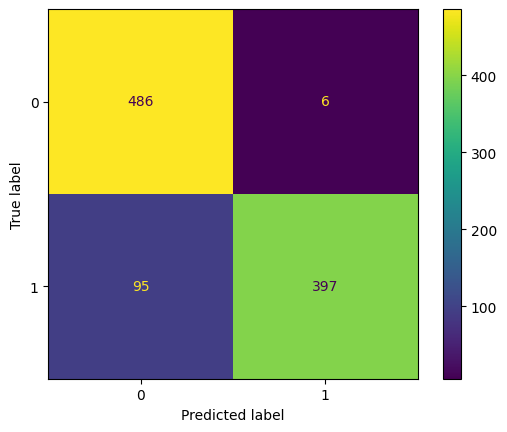

In [53]:
y_hat=np.array([0]*len(y))

for i in range(len(pred)):
    if pred[i]>=0.0018:
        y_hat[i]=1

cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('../outputs/figures/confusion_matrix.png')
plt.show()

In [ ]:
mean_norm = data_norm_test.mean()
std_norm = data_norm_test.std()

mean_z_per_feature = abs_z_scores.mean(axis=0)
mean_z_per_feature

important_features = mean_z_per_feature.sort_values(ascending=False)
important_features 

data_norm_test['V12'].hist(bins=10)